In [1]:
import os
import copy
import warnings

import torch
import random
import pandas as pd
import numpy  as np
import torch.nn as nn
from src.processing import *
from torchvision import models
from torch.utils.data import DataLoader
import src.model_fitting as model_fitting

warnings.filterwarnings("ignore")

SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

!nvidia-smi

C:\Users\ozher\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sat Nov  5 16:48:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.62       Driver Version: 462.62       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 305... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0    10W /  N/A |    106MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
images_amount = check_images_amount()
print(images_amount)

annotations = pd.read_csv("annotation_file.csv")
train, valid = train_val_split(annotations)

if(not valid.shape[0] + train.shape[0] == images_amount["train"]):
    raise ValueError("Sum of len(valid) and len(train) is not equal to total amount of train images")

{'test': 1436, 'train': 3802}


In [3]:
NEW_SIZE, BATCH_SIZE = 224, 32
train_dataset = CarDataset(annotation_file=train, img_dir="train", new_size=NEW_SIZE, mode="train")
valid_dataset = CarDataset(annotation_file=train, img_dir="train", new_size=NEW_SIZE, mode="valid")

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [4]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 11)
model = model.cuda()

torch.cuda.empty_cache()

In [5]:
validating_info = model_fitting.train(train_dataloader, valid_dataloader, model=model, epochs=10, validate=True)

torch.save(copy.deepcopy(model.state_dict()), 'resnet18_validating_weights.pth')
torch.cuda.empty_cache()

epoch:  10%|████████████████▋                                                                                                                                                      | 1/10 [00:29<04:25, 29.55s/it]

[0]: tr_loss: 0.54106 val_loss: 0.30006                tr_f1: 0.81062 val_f1: 0.9061


epoch:  20%|█████████████████████████████████▍                                                                                                                                     | 2/10 [00:54<03:33, 26.66s/it]

[1]: tr_loss: 0.33337 val_loss: 0.11113                tr_f1: 0.87786 val_f1: 0.96442


epoch:  30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [01:18<03:00, 25.74s/it]

[2]: tr_loss: 0.21322 val_loss: 0.12863                tr_f1: 0.92328 val_f1: 0.96171


epoch:  40%|██████████████████████████████████████████████████████████████████▊                                                                                                    | 4/10 [01:44<02:33, 25.52s/it]

[3]: tr_loss: 0.06679 val_loss: 0.03463                tr_f1: 0.97913 val_f1: 0.9878


epoch:  50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [02:08<02:06, 25.21s/it]

[4]: tr_loss: 0.03323 val_loss: 0.02482                tr_f1: 0.98983 val_f1: 0.99092


epoch:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [02:33<01:40, 25.04s/it]

[5]: tr_loss: 0.0295 val_loss: 0.06474                tr_f1: 0.99073 val_f1: 0.98195


epoch:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [02:58<01:14, 24.97s/it]

[6]: tr_loss: 0.00995 val_loss: 0.00539                tr_f1: 0.99718 val_f1: 0.99951


epoch:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 8/10 [03:23<00:49, 24.96s/it]

[7]: tr_loss: 0.00533 val_loss: 0.00439                tr_f1: 0.99839 val_f1: 0.99846


epoch:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [03:48<00:25, 25.05s/it]

[8]: tr_loss: 0.00743 val_loss: 0.00342                tr_f1: 0.99719 val_f1: 0.99897


epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:13<00:00, 25.33s/it]

[9]: tr_loss: 0.00421 val_loss: 0.00301                tr_f1: 0.99818 val_f1: 0.99897


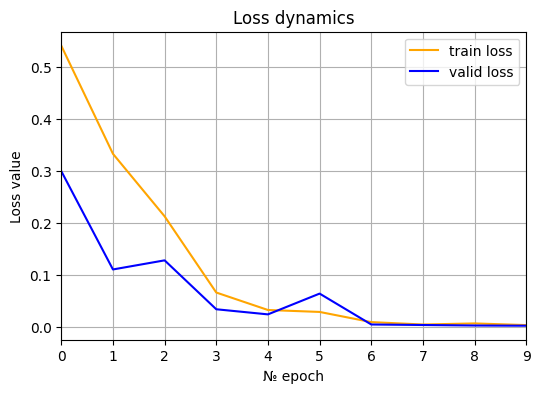

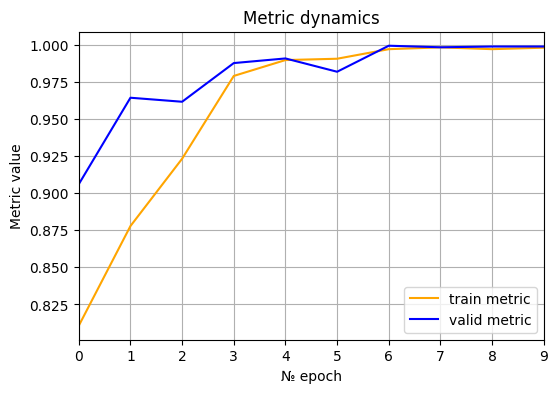

In [6]:
visualize_results(validating_info, "loss", 10)
visualize_results(validating_info, "metric", 10)

----